> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Desc**: 
No-Show Appointmnet data has been analysed and below questions were posed to answer from the analysis.

> a) Does Age and Gender has some patterns or impact on No-Show?
  
> b) Do patients with sms received show for the appointment?
  
> c) Whether wait time between scheduled date and appointment date impacts No-Show?	


In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import datetime 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


#### Functions

In [55]:
### Function to create bar plot for a variable
def plotBar(df,colname):
    df.colname.value_counts().plot(kind='bar')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [56]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [57]:
# Data Sanity Checking
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [58]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1], dtype=int64)



### Data Sanity Checking and Cleaning 

> **Desc**: 

> a) Checking the data type of each variables

> b) presence of null values and duplicate values.
  
> c) Removing anamolies from age variable like -1 and outliers which are more than 100
  
> d) checking the labels of each categorical variable.



In [59]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.Age.unique())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
0
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [60]:
df = df[df['Age'] > 0]
df = df[df['Age'] < 100]

In [61]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)



In [ ]:
#### Deriving wait time variable
> **Description**

This variable 

In [ ]:
df['WaitTime'] = (df.AppointmentDay - df.ScheduledDay).dt.days

In [62]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [35]:
df.WaitTime.unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        72,  63,  19,  48,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  76,
        68,  75,  88,  80,  78,  53,  67,  74,  84, 111,  -2,  79,  85,
        97,  93,  82, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89,
       150, 125, 126, 110, 118,  73,  70,  81, 102, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145, 122], dtype=int64)

In [63]:
df = df[df.WaitTime >= 0]

In [64]:
df.WaitTime.unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  72,
        63,  19,  48,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  76,  68,
        75,  88,  80,  78,  53,  67,  74,  84, 111,  79,  85,  97,  93,
        82, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150, 125,
       126, 110, 118,  73,  70,  81, 102, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122], dtype=int64)

In [65]:
# WHEN NO SHOW is 0 then Yes (its a show) 
df['No-show']= df['No-show'].apply(lambda x: 0 if x =="Yes" else 1)

In [66]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitTime
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,1


In [67]:
df.shape

(69819, 15)


## Exploratory Data Analysis

#### Three variables Age, Gender and SMS_Received are being analysed at univariate and bivariate levels.


#### Analysis on Age group

> **Desc**: 
Age could not be analysed directly therefore it was binned into groups to see the distribution by plotting histogram. It has been observed that maximum patients belong to 50-60 age group. 
Also, to dive more into the analysis, the dataframe was divided into show dataframe and no show dataframe. 

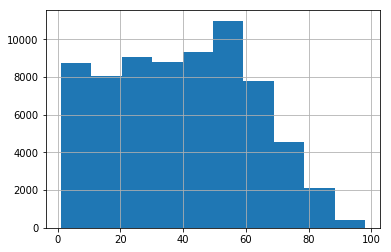

In [71]:
import matplotlib as plt
%matplotlib inline 

df.Age.hist()

In [72]:
bins = ["0-10", "10-20", "20-30", "30-40","40-50", "50-60", "60-70", "70-80","80-90", "90-100"]
df_age_bins = pd.cut(df.Age, [0, 10,20,30,40,50,60,70,80,90,100], labels=bins)

df_age_bins
df_age_bins = pd.value_counts(df_age_bins).sort_values(ascending=False)

df_NoShow = df[df['No-show'] == 0]

In [73]:
bins = ["0-10", "10-20", "20-30", "30-40","40-50", "50-60", "60-70", "70-80","80-90", "90-100"]
df_age_bins_No_show = pd.cut(df_NoShow.Age, [0, 10,20,30,40,50,60,70,80,90,100], labels=bins)

df_age_bins_No_show
df_age_bins_No_show = pd.value_counts(df_age_bins_No_show).sort_values(ascending=False)

In [82]:
df_age_bins_No_show = pd.DataFrame(df_age_bins_No_show)
df_age_bins_No_show['bucket'] = df_age_bins_No_show.index
df_age_bins_No_show.reset_index(level=0, inplace=True)

df_age_bins_No_show.rename(columns={'0': 'count'})

df_age_bins_No_show.rename(columns={'Age': 'count'})

,index,count,bucket
0,20-30,3175,20-30
1,30-40,3060,30-40
2,10-20,2826,10-20
3,0-10,2793,0-10
4,40-50,2697,40-50
5,50-60,2550,50-60
6,60-70,1552,60-70
7,70-80,837,70-80
8,80-90,387,80-90
9,90-100,54,90-100


In [83]:
col = ['index','level_0','index1']

In [84]:
df_age_buckets = pd.DataFrame(df_age_bins)
df_age_buckets = df_age_buckets.rename(columns={0: 'count'})
df_age_buckets['bucket'] = df_age_buckets.index
df_age_buckets.head()

,Age,bucket
50-60,10868,50-60
30-40,9713,30-40
40-50,9568,40-50
20-30,9051,20-30
0-10,8757,0-10


In [85]:
df_age_buckets.head()

,Age,bucket
50-60,10868,50-60
30-40,9713,30-40
40-50,9568,40-50
20-30,9051,20-30
0-10,8757,0-10


In [86]:
df_age_buckets.head()

,Age,bucket
50-60,10868,50-60
30-40,9713,30-40
40-50,9568,40-50
20-30,9051,20-30
0-10,8757,0-10


In [87]:
df_age_bins_No_show.head()


,index,Age,bucket
0,20-30,3175,20-30
1,30-40,3060,30-40
2,10-20,2826,10-20
3,0-10,2793,0-10
4,40-50,2697,40-50


In [88]:
df_age_buckets.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 10 entries, 50-60 to 90-100
Data columns (total 2 columns):
Age       10 non-null int64
bucket    10 non-null category
dtypes: category(1), int64(1)
memory usage: 900.0 bytes


In [89]:
df_age_buckets.bucket = df_age_buckets.bucket.astype(str)
df_age_bins_No_show.bucket = df_age_bins_No_show.bucket.astype(str)

In [90]:
df_age_buckets.rename(columns={'Age': 'count'},inplace=True)
df_age_bins_No_show.rename(columns={'Age': 'count'},inplace=True)

df_age_bins_No_show = df_age_bins_No_show.sort_values('bucket')
df_age_buckets = df_age_buckets.sort_values('bucket')

In [140]:
df_join = df_age_bins_No_show.join(df_age_buckets,on='bucket',how='inner',rsuffix='_r')

df_join['Per'] = df_join['count_r']/df_join['count']*100
df_join.sort_values('Per',inplace=True)

col = ['index','bucket_r','count','count_r']
df_final = df_join.drop(col,axis=1)

df_final

,bucket,Per
2,10-20,284.005662
0,20-30,285.070866
3,0-10,313.533835
1,30-40,317.418301
4,40-50,354.764553
9,90-100,357.407407
5,50-60,426.196078
8,80-90,445.219638
7,70-80,480.525687
6,60-70,508.891753


#### Conclusion on Univariate Analysis of Age
> **Conclusion**
The Age Analysis was performed on No-Show dataset to see if any particular age group has more no-show.
However, it has been that older people has less no-show where as younger ones has more no-show.

#### Gender Analysis


> **Desc**: 
From exploratory data analysis, it has been seen that female patients are approx.50% more than the male patients. Thus, the distribution of No-Show across gender makes less sense as per the below analysis.

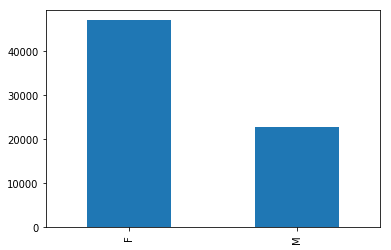

In [91]:
df.Gender.value_counts().plot(kind="bar")

In [92]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitTime
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,1


In [93]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [94]:
len(df[df.Gender == "F"])

47023

In [95]:
len(df[df.Gender == "M"])

22796

In [96]:
# Females that didn't show up
len(df[(df.Gender == "F") & (df['No-show'] == 0) ])

13377

In [97]:
# Males that didn't show up
len(df[(df.Gender == "M") & (df['No-show'] == 0) ])

6554

In [98]:
# Percentage of Females that didn't show up
len(df[(df.Gender == "F") & (df['No-show'] == 0) ]) / len(df[df.Gender == "F"]) * 100

28.447780873189714

In [99]:
# Percentage Males that didn't show up
len(df[(df.Gender == "M") & (df['No-show'] == 0) ]) / len(df[df.Gender == "M"]) * 100

28.750658010177222

In [ ]:
#### Correlation Plot

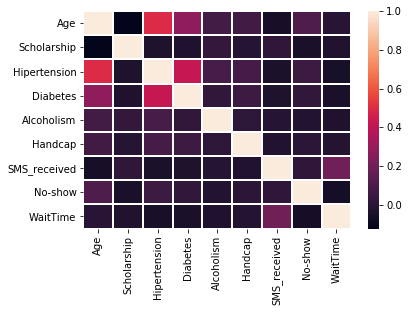

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.drop(['PatientId','AppointmentID'],axis=1).corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=1)
plt.show()

#### Conclusion on Correlation Plot

> From the above plot, it can be seen that most of the variables like Age and Wait Time have darkest cell(close to 0)i.e,
there is no correlation between them.

#### SMS Recieved Analysis


> **Desc**: To see if a patient who has received an sms would show or not,the analysis was performed on the data with obnly no-show observations.

In [101]:
df_NoShow.groupby('SMS_received')['No-show'].count()

SMS_received
0    10363
1     9568
Name: No-show, dtype: int64

Text(0,0.5,'Count')

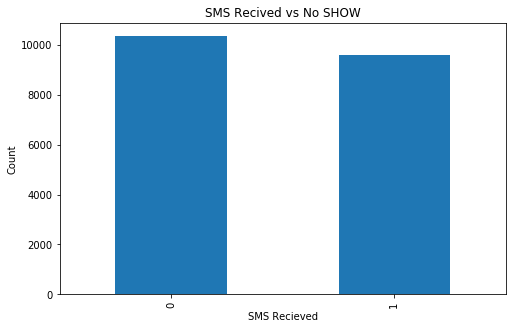

In [102]:
sms_rcvd = df_NoShow.groupby('SMS_received')['No-show'].count().plot(kind="bar",figsize=(8,5))
sms_rcvd.set_title("SMS Recived vs No SHOW")
sms_rcvd.set_xlabel("SMS Recieved")
sms_rcvd.set_ylabel("Count")

#### Conclusion from univariate analysis of SMS Received
>  It has been observed that patients who did not show up do not differ much whether they have received an sms or not as 
there number is almost same. 

### Does time duration between the ScheduledDay and AppointmentDay  play a factor in no show ?

#### Time Gap Analysis


> **Desc**: 
In order to analyse the above posed ques, Wait Time by subtracting Scheduled Day from Appointment Day has been derived. This time gap has been further binned into groups and then distribution of no-show has been plotted with the help of the histogram.

In [152]:
df.WaitTime.unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  72,
        63,  19,  48,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  76,  68,
        75,  88,  80,  78,  53,  67,  74,  84, 111,  79,  85,  97,  93,
        82, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150, 125,
       126, 110, 118,  73,  70,  81, 102, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122], dtype=int64)

In [104]:
binss = [0,10,20,30,40,50,60,180]

df_timegap = pd.cut(df_NoShow['WaitTime'], bins=binss).value_counts().reset_index()
df_timegap.sort_values('index',inplace=True)


Text(0,0.5,'Count')

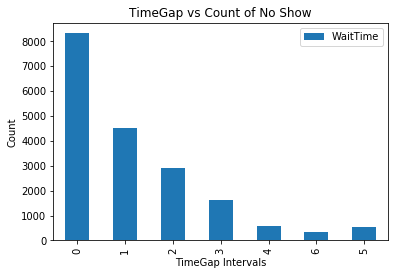

In [109]:
df_timegap_bar = df_timegap.plot(kind="bar")
df_timegap_bar.set_title("TimeGap vs Count of No Show")
df_timegap_bar.set_xlabel("TimeGap Intervals")
df_timegap_bar.set_ylabel("Count") 

#### Conclusion on above graph
It has been clearly observed that people with wait time of 1-10 days have maximum no-show.

<a id='conclusions'></a>
## Conclusions

> a)For question 1, it has been observed that people above the age of 60 has less no-shows as compared to other people. Also, from gender point of view, female and male patients have approx.equal percentage of no-show. Therefore, it may not prove to be an impactful variable.

> b)For question 2, sms received does not seem to change the precentage of no-show as it has been observed that percentage of people who receive an sms and do not show up is almost same as those who deos not receive.

> c)For question 3, it has been observed that people with less Time Gap of 1-10 days have higher no-shows as compared to other people.

### Limitations
> 1. The gender is skewed as it has more female patients than male. So, this variable could not be used for analysis.
> 2. The Residential information regarding patients could be used in order to see if the assigned clinic is located nearby or is far. That could be useful to see the impact on no-show.

In [111]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Project 2-Megha Hada.ipynb'])

0